In [1]:
import pandas as pd
import numpy as np
import pickle as pk

from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
import statistics

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

from gensim.models import Phrases
from gensim.models.phrases import Phraser

import gensim.downloader as api

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_set/csv/dataset.csv')
df.head()

,text,Book,label
0,CHAPTER IIn the late summer of that year we li...,Farewell to arms,Modernism
1,The plain was rich with crops; there were many...,Farewell to arms,Modernism
2,Sometimes in the dark we heard the troops marc...,Farewell to arms,Modernism
3,There were smal gray motor-cars that passed go...,Farewell to arms,Modernism
4,At the start of the winter came the permanent ...,Farewell to arms,Modernism


In [3]:
df.isnull().sum()

text     5
Book     0
label    0
dtype: int64

In [4]:
df = df.dropna().reset_index(drop=True)

In [5]:
df.isnull().sum()

text     0
Book     0
label    0
dtype: int64

In [6]:
label = df['label'].tolist()
label_name = np.unique(label)

label_dict = {}
for c in range(0 , len(label_name)) : 
    label_dict[label_name[c]] = c
label_dict

{'Modernism': 0,
 'Naturalism': 1,
 'Realism': 2,
 'Romanticism': 3,
 'Symbolism': 4}

label
Modernism       4805
Naturalism      7047
Realism        12272
Romanticism     5042
Symbolism       2972
dtype: int64


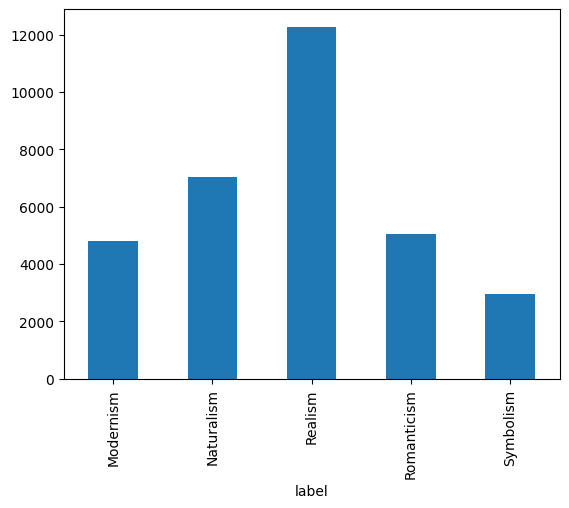

In [7]:
print(df.groupby('label').size())
 
# Plotting the bar chart
df.groupby('label').size().plot(kind='bar');

In [8]:
modernism = df[(df['label']== 'Modernism')]
naturalism = df[(df['label']== 'Naturalism')]
realism = df[(df['label']== 'Realism')]
romanticism = df[(df['label']== 'Romanticism')]
symbolism = df[(df['label']== 'Symbolism')]

In [9]:
a1 = (modernism['text'].str.len()).mean()
a2 = (naturalism['text'].str.len()).mean()
a3 = (realism['text'].str.len()).mean()
a4 = (romanticism['text'].str.len()).mean()
a5 = (symbolism['text'].str.len()).mean()

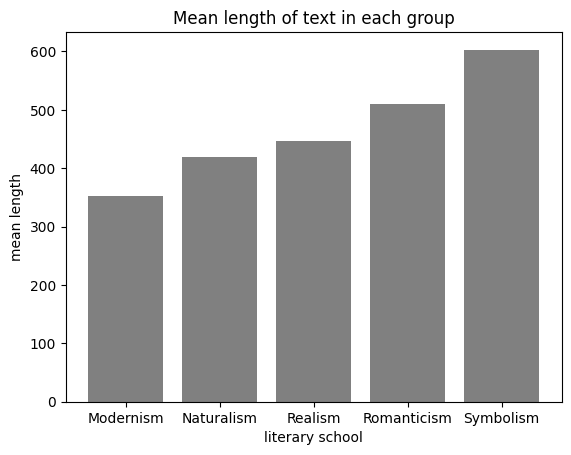

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

style = ['Modernism','Naturalism', 'Realism','Romanticism', 'Symbolism']
mean_length = [a1, a2, a3, a4, a5]
mean_length.sort()
plt.bar(style,mean_length, color='gray')
plt.title('Mean length of text in each group')
plt.xlabel('literary school')
plt.ylabel('mean length')
plt.show()

In [11]:
df['label'] = df['label'].replace(['Modernism','Naturalism', 'Realism', 'Romanticism','Symbolism'], ['0','1','2','3','4'])

In [12]:
df

,text,Book,label
0,CHAPTER IIn the late summer of that year we li...,Farewell to arms,0
1,The plain was rich with crops; there were many...,Farewell to arms,0
2,Sometimes in the dark we heard the troops marc...,Farewell to arms,0
3,There were smal gray motor-cars that passed go...,Farewell to arms,0
4,At the start of the winter came the permanent ...,Farewell to arms,0
...,...,...,...
32133,"On the last night, with my trunk packed and my...",Metamorphosis,4
32134,Most of the big shore places were closed now a...,Metamorphosis,4
32135,"And as I sat there brooding on the old, unknow...",Metamorphosis,4
32136,"Gatsby believed in the green light, the orgast...",Metamorphosis,4


In [13]:
x_data = df['text']
y_data = df['label']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, shuffle=True)

In [15]:
x_train, y_train

(27288    “What, Jane! Is this true? Is such really the ...
 21157    Thoroughly tired, I went to bed too, at midnig...
 20244    ‘Too well, sir,’ he replied. We had sunk our v...
 5723     “Well, well,” said Drouet, “you did out of sig...
 13658    "The poor man seems to have been in the wrong ...
                                ...                        
 5754     “Be it as you will,” said Patton.Hurstwood lea...
 2092     He fumbled in his pocket pulling out the crush...
 13471    "Are you never serious?" he asked."With seriou...
 7568     “Sure it was,” McTeague hastened to reply. “Su...
 5456     “Oh, then he called twice?” said Drouet, the f...
 Name: text, Length: 24103, dtype: object,
 27288    3
 21157    2
 20244    2
 5723     1
 13658    2
         ..
 5754     1
 2092     0
 13471    2
 7568     1
 5456     1
 Name: label, Length: 24103, dtype: object)

In [16]:
train = pd.DataFrame(x_train).join(y_train)
train

,text,label
27288,"“What, Jane! Is this true? Is such really the ...",3
21157,"Thoroughly tired, I went to bed too, at midnig...",2
20244,"‘Too well, sir,’ he replied. We had sunk our v...",2
5723,"“Well, well,” said Drouet, “you did out of sig...",1
13658,"""The poor man seems to have been in the wrong ...",2
...,...,...
5754,"“Be it as you will,” said Patton.Hurstwood lea...",1
2092,He fumbled in his pocket pulling out the crush...,0
13471,"""Are you never serious?"" he asked.""With seriou...",2
7568,"“Sure it was,” McTeague hastened to reply. “Su...",1


In [17]:
test = pd.DataFrame(x_test).join(y_test)
test

,text,label
6279,“Won’t you come have a drink?”“Not until after...,1
28903,It was an evening of no common delight to them...,3
6017,He called a cab and was driven through the dre...,1
11439,The youth glancing at his companion could see ...,1
22278,"“Oh, very well, take them!” said Emma.“I was o...",2
...,...,...
437,Jasper and Rose said that Mildred wanted to kn...,0
10602,Archer looked at her blankly. Could it be poss...,1
12150,". Well, theysay that at first he seemed like h...",2
25918,He spoke cheerfully: the gay tones set my hear...,3


In [18]:
train['Text_Tokenized'] = train['text'].str.lower().apply(word_tokenize)
train

,text,label,Text_Tokenized
27288,"“What, Jane! Is this true? Is such really the ...",3,"[“, what, ,, jane, !, is, this, true, ?, is, s..."
21157,"Thoroughly tired, I went to bed too, at midnig...",2,"[thoroughly, tired, ,, i, went, to, bed, too, ..."
20244,"‘Too well, sir,’ he replied. We had sunk our v...",2,"[‘, too, well, ,, sir, ,, ’, he, replied, ., w..."
5723,"“Well, well,” said Drouet, “you did out of sig...",1,"[“, well, ,, well, ,, ”, said, drouet, ,, “, y..."
13658,"""The poor man seems to have been in the wrong ...",2,"[``, the, poor, man, seems, to, have, been, in..."
...,...,...,...
5754,"“Be it as you will,” said Patton.Hurstwood lea...",1,"[“, be, it, as, you, will, ,, ”, said, patton...."
2092,He fumbled in his pocket pulling out the crush...,0,"[he, fumbled, in, his, pocket, pulling, out, t..."
13471,"""Are you never serious?"" he asked.""With seriou...",2,"[``, are, you, never, serious, ?, '', he, aske..."
7568,"“Sure it was,” McTeague hastened to reply. “Su...",1,"[“, sure, it, was, ,, ”, mcteague, hastened, t..."


In [19]:
test['Text_Tokenized'] = test['text'].str.lower().apply(word_tokenize)
test

,text,label,Text_Tokenized
6279,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”..."
28903,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight..."
6017,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through..."
11439,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou..."
22278,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa..."
...,...,...,...
437,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante..."
10602,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i..."
12150,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see..."
25918,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se..."


In [20]:
vector_size_n_w2v = 300

w2v_model = Word2Vec(vector_size=vector_size_n_w2v,
                     window=3,
                     min_count=1,
                     sg=0) # 0=CBOW, 1=Skip-gram

print(w2v_model)

Word2Vec<vocab=0, vector_size=300, alpha=0.025>


In [21]:
w2v_model.build_vocab(train['Text_Tokenized'])
w2v_model

In [22]:
w2v_model.train(train['Text_Tokenized'], 
                total_examples=w2v_model.corpus_count, 
                epochs=10)

(16983490, 24140840)

In [23]:
w2v_model.save("word2vec/word2vec_model")

In [24]:
pk.dump(vector_size_n_w2v, open('word2vec/vector_size_w2v_metric.pkl', 'wb'))

In [25]:
# The learned vocabulary:
w2v_model.wv.index_to_key

[',',
 '.',
 'the',
 'and',
 'to',
 'of',
 'a',
 'i',
 'in',
 'he',
 'was',
 'it',
 'that',
 '’',
 'you',
 'his',
 '“',
 'her',
 '”',
 'she',
 'with',
 'had',
 '``',
 ';',
 'for',
 '?',
 'as',
 'on',
 'at',
 'not',
 'but',
 'said',
 'him',
 "''",
 'my',
 'me',
 'is',
 '!',
 'be',
 'have',
 'all',
 'they',
 's',
 'by',
 'what',
 'were',
 'from',
 'this',
 "'s",
 'there',
 ':',
 'so',
 'which',
 'if',
 '‘',
 'one',
 'would',
 'no',
 'when',
 'do',
 'out',
 'up',
 'we',
 'an',
 'could',
 'or',
 'them',
 'been',
 't',
 'mr.',
 'like',
 'did',
 'then',
 '--',
 'now',
 'about',
 "n't",
 'who',
 'are',
 'their',
 'more',
 'little',
 'very',
 'into',
 'your',
 'know',
 'some',
 'will',
 'see',
 'down',
 'man',
 'go',
 'time',
 'can',
 'how',
 'went',
 'over',
 'any',
 'come',
 'well',
 'old',
 'than',
 'only',
 'too',
 'after',
 'never',
 'back',
 'other',
 'made',
 ')',
 'before',
 '(',
 'came',
 'again',
 'say',
 'where',
 'thought',
 'here',
 'am',
 'think',
 'much',
 'good',
 'should',
 'm

In [26]:
# Output of the calculated vector for a given word from the vocabulary:
w2v_model.wv['afraid']

array([ 0.33690172,  0.99104553, -0.22846371, -0.06134395, -0.49919915,
       -0.5066716 , -0.4529784 ,  1.5910038 ,  0.18635292, -0.3294673 ,
        0.4793493 , -0.38682553,  0.19045572, -0.15265723,  0.43675074,
       -0.46187216,  0.37445527, -0.46293777,  1.0069665 , -0.26242113,
        0.00386342,  0.0380513 , -0.44333714, -0.46656966,  0.33561563,
       -0.07346567, -0.63633555, -0.92888576, -0.2714602 , -1.2211843 ,
       -0.20147718, -0.20014791, -1.639628  , -0.4352306 ,  0.44818977,
       -0.8822323 , -0.18469693,  0.36504856,  0.28310883, -0.28187278,
       -0.49066144,  0.7520016 ,  0.5007158 ,  0.2702313 ,  0.8926143 ,
        0.7402789 ,  0.7326891 ,  0.7984435 , -0.54731756,  0.28835246,
       -0.81900394,  1.2480392 ,  0.07302341,  1.1375307 ,  0.6456659 ,
        0.44685867, -0.05912159,  0.0245875 ,  0.14430644, -0.23521017,
       -0.7900153 ,  0.9158745 , -0.3184628 ,  0.73497677,  0.43976954,
        0.36476547, -1.0278441 , -0.37634128,  0.1946414 ,  0.40

In [27]:
len(w2v_model.wv['afraid'])

300

In [28]:
# Display the words that are most similar to a given word from the vocabulary:
w2v_model.wv.most_similar('afraid')

[('sure', 0.8062691688537598),
 ('ashamed', 0.7850127220153809),
 ('thinking', 0.7153028845787048),
 ('aware', 0.7057684659957886),
 ('convinced', 0.7055392265319824),
 ('sick', 0.7029909491539001),
 ('glad', 0.7026901245117188),
 ('kind—and', 0.692375898361206),
 ('sorry', 0.6920347213745117),
 ('tired', 0.6855003833770752)]

In [29]:
#  generate aggregate sentence vectors based on the word vectors for each word in the given sentence

words = set(w2v_model.wv.index_to_key )
train['Text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in train['Text_Tokenized']])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13528\1810960688.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train['Text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [30]:
for i, v in enumerate(train['Text_vect']):
    print(len(train['Text_Tokenized'].iloc[i]), len(v))


114 114
153 153
54 54
74 74
105 105
40 40
88 88
127 127
39 39
35 35
40 40
207 207
31 31
33 33
469 469
32 32
33 33
221 221
152 152
39 39
33 33
59 59
37 37
40 40
58 58
459 459
62 62
82 82
502 502
61 61
48 48
99 99
473 473
74 74
62 62
70 70
70 70
50 50
182 182
45 45
43 43
26 26
31 31
63 63
158 158
100 100
134 134
47 47
42 42
76 76
41 41
57 57
42 42
475 475
53 53
59 59
43 43
78 78
28 28
133 133
42 42
66 66
123 123
103 103
126 126
44 44
57 57
26 26
65 65
202 202
40 40
24 24
30 30
20 20
43 43
44 44
79 79
412 412
39 39
38 38
48 48
70 70
61 61
60 60
43 43
76 76
65 65
63 63
112 112
92 92
8 8
40 40
146 146
39 39
131 131
95 95
107 107
31 31
56 56
55 55
84 84
57 57
308 308
29 29
149 149
82 82
181 181
107 107
248 248
150 150
38 38
33 33
50 50
74 74
39 39
54 54
43 43
39 39
32 32
39 39
67 67
25 25
35 35
56 56
79 79
23 23
51 51
48 48
34 34
124 124
476 476
56 56
33 33
49 49
47 47
60 60
71 71
30 30
45 45
35 35
127 127
119 119
37 37
82 82
25 25
49 49
201 201
90 90
170 170
29 29
38 38
107 107
155 155
87 8

138 138
152 152
28 28
35 35
70 70
68 68
33 33
29 29
211 211
137 137
78 78
41 41
126 126
57 57
215 215
98 98
28 28
66 66
94 94
58 58
121 121
152 152
424 424
88 88
66 66
162 162
149 149
45 45
109 109
312 312
43 43
84 84
62 62
58 58
236 236
54 54
109 109
94 94
193 193
125 125
38 38
112 112
33 33
170 170
199 199
48 48
128 128
19 19
46 46
71 71
38 38
36 36
31 31
80 80
54 54
54 54
94 94
35 35
44 44
137 137
214 214
125 125
129 129
44 44
109 109
105 105
68 68
104 104
31 31
53 53
62 62
65 65
51 51
31 31
85 85
59 59
96 96
27 27
67 67
32 32
40 40
50 50
28 28
25 25
27 27
51 51
94 94
630 630
91 91
43 43
2208 2208
142 142
33 33
20 20
34 34
57 57
43 43
421 421
85 85
69 69
147 147
32 32
29 29
56 56
24 24
57 57
34 34
33 33
77 77
65 65
85 85
174 174
72 72
111 111
65 65
60 60
39 39
115 115
25 25
46 46
120 120
115 115
154 154
151 151
69 69
85 85
145 145
39 39
83 83
62 62
93 93
140 140
50 50
38 38
71 71
63 63
515 515
41 41
33 33
41 41
52 52
109 109
59 59
73 73
17 17
109 109
33 33
96 96
54 54
36 36
35 35
24

25 25
215 215
93 93
50 50
37 37
53 53
16 16
62 62
51 51
24 24
59 59
32 32
64 64
30 30
36 36
71 71
124 124
66 66
218 218
86 86
62 62
67 67
44 44
72 72
678 678
87 87
48 48
92 92
62 62
95 95
67 67
232 232
112 112
61 61
32 32
11 11
110 110
68 68
64 64
265 265
87 87
41 41
31 31
266 266
44 44
41 41
59 59
28 28
62 62
55 55
87 87
210 210
92 92
84 84
89 89
704 704
34 34
79 79
47 47
58 58
89 89
54 54
440 440
70 70
48 48
25 25
66 66
82 82
97 97
117 117
117 117
90 90
21 21
782 782
33 33
101 101
66 66
87 87
84 84
33 33
272 272
20 20
106 106
45 45
58 58
187 187
54 54
106 106
45 45
38 38
116 116
40 40
29 29
31 31
91 91
91 91
39 39
45 45
81 81
137 137
493 493
25 25
67 67
33 33
204 204
132 132
49 49
67 67
61 61
48 48
449 449
117 117
30 30
46 46
51 51
24 24
29 29
79 79
122 122
114 114
36 36
157 157
62 62
80 80
27 27
99 99
72 72
27 27
75 75
59 59
132 132
90 90
36 36
6 6
94 94
540 540
44 44
57 57
53 53
40 40
30 30
53 53
35 35
97 97
62 62
24 24
31 31
71 71
154 154
119 119
47 47
139 139
108 108
55 55
145 14

25 25
112 112
500 500
175 175
37 37
72 72
37 37
93 93
340 340
197 197
127 127
73 73
78 78
138 138
33 33
65 65
108 108
40 40
60 60
82 82
44 44
162 162
415 415
47 47
22 22
37 37
76 76
92 92
70 70
66 66
457 457
31 31
68 68
98 98
18 18
42 42
54 54
44 44
306 306
24 24
104 104
102 102
51 51
61 61
173 173
63 63
52 52
113 113
38 38
71 71
155 155
25 25
112 112
104 104
57 57
39 39
55 55
292 292
25 25
102 102
562 562
55 55
137 137
42 42
45 45
24 24
189 189
58 58
21 21
28 28
538 538
26 26
56 56
15 15
50 50
56 56
35 35
26 26
109 109
446 446
194 194
22 22
103 103
40 40
137 137
156 156
71 71
607 607
90 90
90 90
36 36
87 87
320 320
28 28
93 93
101 101
100 100
42 42
55 55
79 79
301 301
60 60
29 29
103 103
45 45
69 69
90 90
118 118
100 100
33 33
43 43
72 72
50 50
34 34
72 72
53 53
36 36
33 33
212 212
68 68
52 52
71 71
28 28
37 37
28 28
80 80
72 72
142 142
39 39
80 80
96 96
58 58
164 164
288 288
227 227
34 34
159 159
92 92
24 24
73 73
139 139
41 41
37 37
24 24
28 28
221 221
48 48
41 41
557 557
125 125
53

53 53
36 36
90 90
131 131
55 55
64 64
167 167
46 46
35 35
84 84
206 206
147 147
64 64
122 122
56 56
56 56
66 66
96 96
69 69
51 51
45 45
71 71
58 58
176 176
835 835
32 32
96 96
67 67
73 73
71 71
44 44
74 74
154 154
40 40
35 35
96 96
45 45
109 109
84 84
433 433
103 103
77 77
61 61
626 626
147 147
75 75
59 59
96 96
58 58
76 76
46 46
28 28
25 25
26 26
136 136
50 50
69 69
474 474
98 98
83 83
35 35
80 80
50 50
80 80
34 34
72 72
482 482
93 93
98 98
215 215
28 28
112 112
44 44
198 198
121 121
140 140
48 48
62 62
40 40
146 146
78 78
28 28
180 180
79 79
66 66
66 66
49 49
144 144
72 72
92 92
81 81
30 30
170 170
88 88
54 54
52 52
44 44
80 80
25 25
28 28
164 164
28 28
59 59
24 24
115 115
31 31
45 45
59 59
81 81
66 66
72 72
67 67
83 83
29 29
109 109
26 26
25 25
102 102
88 88
44 44
59 59
93 93
38 38
42 42
239 239
17 17
129 129
29 29
35 35
160 160
53 53
252 252
72 72
59 59
72 72
217 217
28 28
81 81
38 38
41 41
463 463
57 57
148 148
31 31
145 145
49 49
18 18
85 85
72 72
19 19
57 57
61 61
85 85
8 8
61 6

35 35
61 61
73 73
22 22
98 98
349 349
59 59
40 40
22 22
70 70
68 68
39 39
55 55
97 97
139 139
52 52
98 98
56 56
30 30
271 271
77 77
75 75
32 32
177 177
61 61
131 131
177 177
113 113
44 44
33 33
254 254
167 167
42 42
114 114
110 110
133 133
25 25
63 63
90 90
60 60
151 151
62 62
37 37
44 44
132 132
173 173
53 53
103 103
221 221
56 56
28 28
90 90
75 75
68 68
51 51
299 299
38 38
22 22
148 148
137 137
125 125
29 29
120 120
45 45
161 161
62 62
41 41
41 41
70 70
103 103
49 49
50 50
47 47
54 54
62 62
32 32
245 245
102 102
30 30
40 40
40 40
120 120
29 29
41 41
461 461
51 51
36 36
31 31
39 39
180 180
148 148
103 103
51 51
73 73
80 80
30 30
142 142
77 77
59 59
57 57
28 28
25 25
316 316
49 49
60 60
62 62
498 498
73 73
56 56
32 32
59 59
183 183
183 183
138 138
74 74
124 124
27 27
159 159
736 736
35 35
67 67
40 40
113 113
161 161
26 26
31 31
26 26
21 21
65 65
388 388
46 46
28 28
385 385
48 48
31 31
65 65
67 67
161 161
27 27
429 429
45 45
49 49
51 51
219 219
41 41
258 258
77 77
49 49
48 48
84 84
64 6

91 91
72 72
62 62
26 26
278 278
40 40
55 55
116 116
808 808
28 28
75 75
40 40
118 118
75 75
54 54
120 120
39 39
61 61
420 420
84 84
34 34
31 31
82 82
104 104
41 41
28 28
29 29
67 67
58 58
265 265
102 102
84 84
61 61
82 82
516 516
211 211
89 89
86 86
75 75
88 88
73 73
34 34
48 48
37 37
124 124
144 144
475 475
30 30
114 114
87 87
78 78
44 44
151 151
32 32
112 112
25 25
48 48
65 65
51 51
57 57
286 286
54 54
91 91
48 48
47 47
370 370
28 28
287 287
188 188
37 37
87 87
28 28
18 18
146 146
58 58
69 69
144 144
40 40
24 24
74 74
70 70
36 36
39 39
64 64
77 77
35 35
36 36
47 47
74 74
35 35
71 71
38 38
40 40
120 120
38 38


In [31]:
text_vect_avg = []
for v in train['Text_vect']:
    if v.size:
        text_vect_avg.append(v.mean(axis=0))
    else:
        text_vect_avg.append(np.zeros(vector_size_n, dtype=float)) # the same vector size must be used here as for model training
        
        
train['Text_vect_avg'] = text_vect_avg
train

,text,label,Text_Tokenized,Text_vect,Text_vect_avg
27288,"“What, Jane! Is this true? Is such really the ...",3,"[“, what, ,, jane, !, is, this, true, ?, is, s...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.102278285, 0.49535966, -0.065201715, 0.2646..."
21157,"Thoroughly tired, I went to bed too, at midnig...",2,"[thoroughly, tired, ,, i, went, to, bed, too, ...","[[0.095167354, 0.10438269, -0.2495718, -0.0651...","[-0.10654981, 0.34364015, 0.25630912, 0.489508..."
20244,"‘Too well, sir,’ he replied. We had sunk our v...",2,"[‘, too, well, ,, sir, ,, ’, he, replied, ., w...","[[-2.356743, 2.0004394, 1.3618652, -0.03070538...","[-0.030813264, 0.62938184, 0.07137596, 0.19889..."
5723,"“Well, well,” said Drouet, “you did out of sig...",1,"[“, well, ,, well, ,, ”, said, drouet, ,, “, y...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.02458882, 0.82879406, -0.074333265, 0.1581..."
13658,"""The poor man seems to have been in the wrong ...",2,"[``, the, poor, man, seems, to, have, been, in...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[0.049810138, 0.4033897, 0.1051734, 0.56878626..."
...,...,...,...,...,...
5754,"“Be it as you will,” said Patton.Hurstwood lea...",1,"[“, be, it, as, you, will, ,, ”, said, patton....","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.05718274, 0.53000623, 0.09384631, 0.1973457..."
2092,He fumbled in his pocket pulling out the crush...,0,"[he, fumbled, in, his, pocket, pulling, out, t...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[-0.08838866, 0.60287637, 0.07624826, 0.235897..."
13471,"""Are you never serious?"" he asked.""With seriou...",2,"[``, are, you, never, serious, ?, '', he, aske...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[-0.054594807, 0.7266015, 0.25297728, 0.418195..."
7568,"“Sure it was,” McTeague hastened to reply. “Su...",1,"[“, sure, it, was, ,, ”, mcteague, hastened, t...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.026260737, 0.56133026, 0.02247297, 0.31992..."


In [32]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(train['Text_vect_avg']):
    print(len(train['Text_Tokenized'].iloc[i]), len(v))

114 300
153 300
54 300
74 300
105 300
40 300
88 300
127 300
39 300
35 300
40 300
207 300
31 300
33 300
469 300
32 300
33 300
221 300
152 300
39 300
33 300
59 300
37 300
40 300
58 300
459 300
62 300
82 300
502 300
61 300
48 300
99 300
473 300
74 300
62 300
70 300
70 300
50 300
182 300
45 300
43 300
26 300
31 300
63 300
158 300
100 300
134 300
47 300
42 300
76 300
41 300
57 300
42 300
475 300
53 300
59 300
43 300
78 300
28 300
133 300
42 300
66 300
123 300
103 300
126 300
44 300
57 300
26 300
65 300
202 300
40 300
24 300
30 300
20 300
43 300
44 300
79 300
412 300
39 300
38 300
48 300
70 300
61 300
60 300
43 300
76 300
65 300
63 300
112 300
92 300
8 300
40 300
146 300
39 300
131 300
95 300
107 300
31 300
56 300
55 300
84 300
57 300
308 300
29 300
149 300
82 300
181 300
107 300
248 300
150 300
38 300
33 300
50 300
74 300
39 300
54 300
43 300
39 300
32 300
39 300
67 300
25 300
35 300
56 300
79 300
23 300
51 300
48 300
34 300
124 300
476 300
56 300
33 300
49 300
47 300
60 300
71 300
30 300
4

86 300
45 300
171 300
78 300
96 300
25 300
56 300
43 300
29 300
865 300
39 300
422 300
43 300
57 300
68 300
69 300
91 300
61 300
26 300
430 300
188 300
83 300
41 300
26 300
302 300
39 300
53 300
38 300
28 300
119 300
79 300
93 300
175 300
408 300
97 300
217 300
112 300
73 300
69 300
49 300
77 300
58 300
39 300
57 300
128 300
54 300
57 300
163 300
72 300
51 300
27 300
142 300
42 300
81 300
64 300
55 300
75 300
107 300
78 300
40 300
96 300
36 300
244 300
33 300
21 300
33 300
41 300
123 300
46 300
107 300
53 300
193 300
39 300
103 300
275 300
53 300
160 300
110 300
33 300
28 300
70 300
127 300
192 300
172 300
29 300
61 300
95 300
93 300
75 300
383 300
102 300
128 300
113 300
42 300
79 300
21 300
36 300
201 300
109 300
29 300
42 300
62 300
32 300
79 300
468 300
37 300
35 300
23 300
44 300
54 300
247 300
33 300
52 300
38 300
109 300
54 300
44 300
261 300
42 300
102 300
56 300
61 300
55 300
88 300
28 300
50 300
116 300
38 300
84 300
114 300
23 300
164 300
21 300
95 300
28 300
62 300
30 300
3

604 300
28 300
92 300
126 300
22 300
86 300
61 300
29 300
52 300
39 300
113 300
86 300
104 300
135 300
39 300
92 300
42 300
452 300
111 300
130 300
28 300
66 300
442 300
98 300
79 300
86 300
61 300
62 300
179 300
50 300
97 300
68 300
46 300
36 300
215 300
100 300
150 300
50 300
125 300
50 300
74 300
19 300
211 300
110 300
205 300
34 300
103 300
47 300
40 300
20 300
48 300
69 300
69 300
31 300
37 300
63 300
82 300
37 300
101 300
56 300
24 300
208 300
26 300
104 300
34 300
50 300
236 300
29 300
39 300
54 300
110 300
49 300
339 300
48 300
98 300
65 300
74 300
93 300
22 300
52 300
30 300
55 300
55 300
240 300
153 300
64 300
32 300
89 300
32 300
126 300
30 300
164 300
102 300
40 300
255 300
98 300
71 300
25 300
275 300
63 300
46 300
101 300
118 300
48 300
58 300
40 300
237 300
33 300
504 300
58 300
182 300
70 300
71 300
45 300
33 300
28 300
237 300
32 300
43 300
422 300
44 300
342 300
42 300
60 300
51 300
51 300
48 300
5 300
72 300
193 300
73 300
38 300
445 300
282 300
39 300
34 300
49 300


#### A machine learning algorithm cannot work directly with the column generated above (‘Text_vect_avg’). I have added it to the dataset for completeness. However, I continue to work with the created dictionary ‘text_vect_avg’

In [33]:
df_Machine_Learning = pd.DataFrame(text_vect_avg)
df_Machine_Learning

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.102278,0.495360,-0.065202,0.264608,-0.195764,-0.235585,0.295807,0.548886,-0.199363,0.202567,...,-0.471095,0.444319,0.432903,0.469737,-0.113252,-0.237124,0.096188,0.134190,-0.198594,0.106920
1,-0.106550,0.343640,0.256309,0.489509,-0.193901,-0.530209,0.512662,0.696092,-0.081691,-0.122835,...,-0.472038,0.150986,0.300871,0.163403,-0.081718,0.059497,0.188237,-0.088519,-0.031991,-0.122747
2,-0.030813,0.629382,0.071376,0.198898,-0.181698,-0.225792,0.295256,0.489781,-0.112349,0.056887,...,-0.532063,0.356316,0.414395,0.578429,-0.203192,-0.342573,-0.212878,-0.017050,-0.227391,0.098909
3,-0.024589,0.828794,-0.074333,0.158176,-0.135145,-0.172058,0.373128,0.855257,-0.311866,0.153196,...,-0.212667,0.328668,0.464356,0.468031,0.083065,-0.404965,0.131857,0.001040,-0.460049,0.064169
4,0.049810,0.403390,0.105173,0.568786,-0.235348,-0.486610,0.317274,0.683797,-0.043120,-0.015740,...,-0.714600,0.485377,0.229628,0.360559,0.262486,-0.068192,0.064674,0.066404,0.080029,-0.271431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,0.057183,0.530006,0.093846,0.197346,-0.296515,-0.379216,0.499167,0.714061,-0.167490,0.080816,...,-0.380703,0.289358,0.318265,0.257668,0.165225,-0.165638,0.127204,0.018450,-0.188052,-0.132913
24099,-0.088389,0.602876,0.076248,0.235897,-0.279077,-0.217203,0.585845,0.747866,-0.254633,-0.139764,...,-0.161071,0.310086,0.021442,0.342532,-0.070250,-0.082246,-0.098045,-0.204261,0.049462,-0.050445
24100,-0.054595,0.726601,0.252977,0.418196,-0.284950,-0.637086,0.332193,0.701584,-0.141663,-0.096639,...,-0.615419,0.571971,0.366328,0.563019,0.198575,-0.210523,-0.060681,0.162521,-0.274205,-0.006414
24101,-0.026261,0.561330,0.022473,0.319927,-0.228430,-0.341664,0.263432,0.746996,-0.152346,0.049494,...,-0.347419,0.344084,0.379505,0.373208,0.348784,-0.241643,0.139335,-0.070414,-0.112158,-0.050999


In [34]:
#To make this dataset a little prettier, I add names to the columns:

df_Machine_Learning.columns = ['Element_' + str(i+1) for i in range(0, df_Machine_Learning.shape[1])]
df_Machine_Learning

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,0.102278,0.495360,-0.065202,0.264608,-0.195764,-0.235585,0.295807,0.548886,-0.199363,0.202567,...,-0.471095,0.444319,0.432903,0.469737,-0.113252,-0.237124,0.096188,0.134190,-0.198594,0.106920
1,-0.106550,0.343640,0.256309,0.489509,-0.193901,-0.530209,0.512662,0.696092,-0.081691,-0.122835,...,-0.472038,0.150986,0.300871,0.163403,-0.081718,0.059497,0.188237,-0.088519,-0.031991,-0.122747
2,-0.030813,0.629382,0.071376,0.198898,-0.181698,-0.225792,0.295256,0.489781,-0.112349,0.056887,...,-0.532063,0.356316,0.414395,0.578429,-0.203192,-0.342573,-0.212878,-0.017050,-0.227391,0.098909
3,-0.024589,0.828794,-0.074333,0.158176,-0.135145,-0.172058,0.373128,0.855257,-0.311866,0.153196,...,-0.212667,0.328668,0.464356,0.468031,0.083065,-0.404965,0.131857,0.001040,-0.460049,0.064169
4,0.049810,0.403390,0.105173,0.568786,-0.235348,-0.486610,0.317274,0.683797,-0.043120,-0.015740,...,-0.714600,0.485377,0.229628,0.360559,0.262486,-0.068192,0.064674,0.066404,0.080029,-0.271431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,0.057183,0.530006,0.093846,0.197346,-0.296515,-0.379216,0.499167,0.714061,-0.167490,0.080816,...,-0.380703,0.289358,0.318265,0.257668,0.165225,-0.165638,0.127204,0.018450,-0.188052,-0.132913
24099,-0.088389,0.602876,0.076248,0.235897,-0.279077,-0.217203,0.585845,0.747866,-0.254633,-0.139764,...,-0.161071,0.310086,0.021442,0.342532,-0.070250,-0.082246,-0.098045,-0.204261,0.049462,-0.050445
24100,-0.054595,0.726601,0.252977,0.418196,-0.284950,-0.637086,0.332193,0.701584,-0.141663,-0.096639,...,-0.615419,0.571971,0.366328,0.563019,0.198575,-0.210523,-0.060681,0.162521,-0.274205,-0.006414
24101,-0.026261,0.561330,0.022473,0.319927,-0.228430,-0.341664,0.263432,0.746996,-0.152346,0.049494,...,-0.347419,0.344084,0.379505,0.373208,0.348784,-0.241643,0.139335,-0.070414,-0.112158,-0.050999


In [35]:
train

,text,label,Text_Tokenized,Text_vect,Text_vect_avg
27288,"“What, Jane! Is this true? Is such really the ...",3,"[“, what, ,, jane, !, is, this, true, ?, is, s...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.102278285, 0.49535966, -0.065201715, 0.2646..."
21157,"Thoroughly tired, I went to bed too, at midnig...",2,"[thoroughly, tired, ,, i, went, to, bed, too, ...","[[0.095167354, 0.10438269, -0.2495718, -0.0651...","[-0.10654981, 0.34364015, 0.25630912, 0.489508..."
20244,"‘Too well, sir,’ he replied. We had sunk our v...",2,"[‘, too, well, ,, sir, ,, ’, he, replied, ., w...","[[-2.356743, 2.0004394, 1.3618652, -0.03070538...","[-0.030813264, 0.62938184, 0.07137596, 0.19889..."
5723,"“Well, well,” said Drouet, “you did out of sig...",1,"[“, well, ,, well, ,, ”, said, drouet, ,, “, y...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.02458882, 0.82879406, -0.074333265, 0.1581..."
13658,"""The poor man seems to have been in the wrong ...",2,"[``, the, poor, man, seems, to, have, been, in...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[0.049810138, 0.4033897, 0.1051734, 0.56878626..."
...,...,...,...,...,...
5754,"“Be it as you will,” said Patton.Hurstwood lea...",1,"[“, be, it, as, you, will, ,, ”, said, patton....","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.05718274, 0.53000623, 0.09384631, 0.1973457..."
2092,He fumbled in his pocket pulling out the crush...,0,"[he, fumbled, in, his, pocket, pulling, out, t...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[-0.08838866, 0.60287637, 0.07624826, 0.235897..."
13471,"""Are you never serious?"" he asked.""With seriou...",2,"[``, are, you, never, serious, ?, '', he, aske...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[-0.054594807, 0.7266015, 0.25297728, 0.418195..."
7568,"“Sure it was,” McTeague hastened to reply. “Su...",1,"[“, sure, it, was, ,, ”, mcteague, hastened, t...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.026260737, 0.56133026, 0.02247297, 0.31992..."


In [36]:
train.reset_index(drop=True, inplace=True)

In [37]:
train

,text,label,Text_Tokenized,Text_vect,Text_vect_avg
0,"“What, Jane! Is this true? Is such really the ...",3,"[“, what, ,, jane, !, is, this, true, ?, is, s...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.102278285, 0.49535966, -0.065201715, 0.2646..."
1,"Thoroughly tired, I went to bed too, at midnig...",2,"[thoroughly, tired, ,, i, went, to, bed, too, ...","[[0.095167354, 0.10438269, -0.2495718, -0.0651...","[-0.10654981, 0.34364015, 0.25630912, 0.489508..."
2,"‘Too well, sir,’ he replied. We had sunk our v...",2,"[‘, too, well, ,, sir, ,, ’, he, replied, ., w...","[[-2.356743, 2.0004394, 1.3618652, -0.03070538...","[-0.030813264, 0.62938184, 0.07137596, 0.19889..."
3,"“Well, well,” said Drouet, “you did out of sig...",1,"[“, well, ,, well, ,, ”, said, drouet, ,, “, y...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.02458882, 0.82879406, -0.074333265, 0.1581..."
4,"""The poor man seems to have been in the wrong ...",2,"[``, the, poor, man, seems, to, have, been, in...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[0.049810138, 0.4033897, 0.1051734, 0.56878626..."
...,...,...,...,...,...
24098,"“Be it as you will,” said Patton.Hurstwood lea...",1,"[“, be, it, as, you, will, ,, ”, said, patton....","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.05718274, 0.53000623, 0.09384631, 0.1973457..."
24099,He fumbled in his pocket pulling out the crush...,0,"[he, fumbled, in, his, pocket, pulling, out, t...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[-0.08838866, 0.60287637, 0.07624826, 0.235897..."
24100,"""Are you never serious?"" he asked.""With seriou...",2,"[``, are, you, never, serious, ?, '', he, aske...","[[-0.5903874, 2.2261689, -0.22125407, 0.765775...","[-0.054594807, 0.7266015, 0.25297728, 0.418195..."
24101,"“Sure it was,” McTeague hastened to reply. “Su...",1,"[“, sure, it, was, ,, ”, mcteague, hastened, t...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.026260737, 0.56133026, 0.02247297, 0.31992..."


In [38]:
df_Machine_Learning

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,0.102278,0.495360,-0.065202,0.264608,-0.195764,-0.235585,0.295807,0.548886,-0.199363,0.202567,...,-0.471095,0.444319,0.432903,0.469737,-0.113252,-0.237124,0.096188,0.134190,-0.198594,0.106920
1,-0.106550,0.343640,0.256309,0.489509,-0.193901,-0.530209,0.512662,0.696092,-0.081691,-0.122835,...,-0.472038,0.150986,0.300871,0.163403,-0.081718,0.059497,0.188237,-0.088519,-0.031991,-0.122747
2,-0.030813,0.629382,0.071376,0.198898,-0.181698,-0.225792,0.295256,0.489781,-0.112349,0.056887,...,-0.532063,0.356316,0.414395,0.578429,-0.203192,-0.342573,-0.212878,-0.017050,-0.227391,0.098909
3,-0.024589,0.828794,-0.074333,0.158176,-0.135145,-0.172058,0.373128,0.855257,-0.311866,0.153196,...,-0.212667,0.328668,0.464356,0.468031,0.083065,-0.404965,0.131857,0.001040,-0.460049,0.064169
4,0.049810,0.403390,0.105173,0.568786,-0.235348,-0.486610,0.317274,0.683797,-0.043120,-0.015740,...,-0.714600,0.485377,0.229628,0.360559,0.262486,-0.068192,0.064674,0.066404,0.080029,-0.271431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,0.057183,0.530006,0.093846,0.197346,-0.296515,-0.379216,0.499167,0.714061,-0.167490,0.080816,...,-0.380703,0.289358,0.318265,0.257668,0.165225,-0.165638,0.127204,0.018450,-0.188052,-0.132913
24099,-0.088389,0.602876,0.076248,0.235897,-0.279077,-0.217203,0.585845,0.747866,-0.254633,-0.139764,...,-0.161071,0.310086,0.021442,0.342532,-0.070250,-0.082246,-0.098045,-0.204261,0.049462,-0.050445
24100,-0.054595,0.726601,0.252977,0.418196,-0.284950,-0.637086,0.332193,0.701584,-0.141663,-0.096639,...,-0.615419,0.571971,0.366328,0.563019,0.198575,-0.210523,-0.060681,0.162521,-0.274205,-0.006414
24101,-0.026261,0.561330,0.022473,0.319927,-0.228430,-0.341664,0.263432,0.746996,-0.152346,0.049494,...,-0.347419,0.344084,0.379505,0.373208,0.348784,-0.241643,0.139335,-0.070414,-0.112158,-0.050999


In [39]:
final_df = pd.concat([train[['label', 'text']], df_Machine_Learning], axis=1, sort=False)
final_df

,label,text,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,3,"“What, Jane! Is this true? Is such really the ...",0.102278,0.495360,-0.065202,0.264608,-0.195764,-0.235585,0.295807,0.548886,...,-0.471095,0.444319,0.432903,0.469737,-0.113252,-0.237124,0.096188,0.134190,-0.198594,0.106920
1,2,"Thoroughly tired, I went to bed too, at midnig...",-0.106550,0.343640,0.256309,0.489509,-0.193901,-0.530209,0.512662,0.696092,...,-0.472038,0.150986,0.300871,0.163403,-0.081718,0.059497,0.188237,-0.088519,-0.031991,-0.122747
2,2,"‘Too well, sir,’ he replied. We had sunk our v...",-0.030813,0.629382,0.071376,0.198898,-0.181698,-0.225792,0.295256,0.489781,...,-0.532063,0.356316,0.414395,0.578429,-0.203192,-0.342573,-0.212878,-0.017050,-0.227391,0.098909
3,1,"“Well, well,” said Drouet, “you did out of sig...",-0.024589,0.828794,-0.074333,0.158176,-0.135145,-0.172058,0.373128,0.855257,...,-0.212667,0.328668,0.464356,0.468031,0.083065,-0.404965,0.131857,0.001040,-0.460049,0.064169
4,2,"""The poor man seems to have been in the wrong ...",0.049810,0.403390,0.105173,0.568786,-0.235348,-0.486610,0.317274,0.683797,...,-0.714600,0.485377,0.229628,0.360559,0.262486,-0.068192,0.064674,0.066404,0.080029,-0.271431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,1,"“Be it as you will,” said Patton.Hurstwood lea...",0.057183,0.530006,0.093846,0.197346,-0.296515,-0.379216,0.499167,0.714061,...,-0.380703,0.289358,0.318265,0.257668,0.165225,-0.165638,0.127204,0.018450,-0.188052,-0.132913
24099,0,He fumbled in his pocket pulling out the crush...,-0.088389,0.602876,0.076248,0.235897,-0.279077,-0.217203,0.585845,0.747866,...,-0.161071,0.310086,0.021442,0.342532,-0.070250,-0.082246,-0.098045,-0.204261,0.049462,-0.050445
24100,2,"""Are you never serious?"" he asked.""With seriou...",-0.054595,0.726601,0.252977,0.418196,-0.284950,-0.637086,0.332193,0.701584,...,-0.615419,0.571971,0.366328,0.563019,0.198575,-0.210523,-0.060681,0.162521,-0.274205,-0.006414
24101,1,"“Sure it was,” McTeague hastened to reply. “Su...",-0.026261,0.561330,0.022473,0.319927,-0.228430,-0.341664,0.263432,0.746996,...,-0.347419,0.344084,0.379505,0.373208,0.348784,-0.241643,0.139335,-0.070414,-0.112158,-0.050999


In [40]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(df_Machine_Learning, final_df['label'])

GaussianNB()

In [41]:
pk.dump(gnb_classifier, open('gnb_model.pkl', 'wb'))

In [42]:
w2v_model_reloaded = Word2Vec.load("word2vec/word2vec_model")
vector_size_n_reloaded = pk.load(open("word2vec/vector_size_w2v_metric.pkl",'rb'))

w2v_model_reloaded , vector_size_n_reloaded

(<gensim.models.word2vec.Word2Vec at 0x244ed1c4460>, 300)

In [43]:
words = set(w2v_model_reloaded.wv.index_to_key )
test['text_vect'] = np.array([np.array([w2v_model_reloaded.wv[i] for i in ls if i in words])
                                           for ls in test['Text_Tokenized']])


test

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13528\4250242483.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test['text_vect'] = np.array([np.array([w2v_model_reloaded.wv[i] for i in ls if i in words])


,text,label,Text_Tokenized,text_vect
6279,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”...","[[0.1770829, 2.455616, -0.38253108, -0.6672974..."
28903,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight...","[[0.5842958, 0.16910854, -0.31513047, 0.083231..."
6017,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088..."
11439,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou...","[[0.65657675, -0.12237338, 0.08473449, 1.90201..."
22278,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa...","[[0.1770829, 2.455616, -0.38253108, -0.6672974..."
...,...,...,...,...
437,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante...","[[0.092012756, 0.113873966, 0.040049884, 0.079..."
10602,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i...","[[0.06918451, 0.9949239, 0.3493296, 0.26585454..."
12150,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see...","[[-0.9728298, 0.33377934, 0.27946573, -0.29521..."
25918,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088..."


In [44]:
for i, v in enumerate(test['text_vect']):
    print(len(test['Text_Tokenized'].iloc[i]), len(v))

34 34
96 90
87 84
23 23
47 47
123 117
229 219
211 208
143 141
46 45
71 64
52 52
631 618
143 137
22 22
275 270
25 25
111 109
22 21
34 32
23 23
45 44
91 90
58 58
63 61
219 209
58 55
53 47
32 32
56 55
61 61
55 50
40 39
38 38
38 37
94 93
113 105
105 104
94 90
347 341
34 34
125 116
100 100
37 36
42 42
39 37
38 38
54 52
46 45
111 107
53 53
35 32
39 38
90 90
39 39
83 82
37 36
141 139
55 52
43 42
79 79
42 41
44 41
37 37
25 24
77 75
122 120
235 224
27 27
29 27
58 55
76 76
172 170
71 69
98 98
48 47
295 267
31 31
101 96
452 438
190 184
118 111
79 72
41 39
27 25
53 51
107 106
37 37
176 167
46 46
123 118
55 53
111 108
58 57
41 41
28 27
56 55
32 32
42 42
159 153
46 45
35 34
61 61
25 25
91 86
43 40
76 76
51 50
42 42
22 22
79 79
53 53
76 72
50 48
67 67
62 62
77 75
52 51
209 207
149 147
406 390
60 60
40 37
20 19
96 92
37 35
82 78
180 175
100 98
69 66
85 82
42 41
103 100
33 32
26 25
38 37
275 273
26 23
31 30
66 61
45 43
54 51
53 52
63 59
42 42
71 70
45 44
39 39
233 226
178 177
30 30
30 29
33 31
76 75
98

66 65
90 90
32 32
71 69
81 78
35 34
106 96
48 44
27 27
40 39
64 63
34 34
74 73
39 39
60 58
199 196
67 67
156 150
44 43
140 131
79 74
63 60
97 92
114 110
52 49
36 35
388 364
46 39
84 82
36 32
120 114
36 36
844 824
194 191
43 40
257 253
112 112
99 96
258 256
349 345
38 36
91 87
51 50
41 41
51 47
44 42
48 48
77 76
38 38
66 65
58 57
32 32
39 39
86 84
34 33
36 35
71 68
59 58
464 437
89 87
209 203
103 99
91 86
58 56
113 106
42 39
43 43
45 44
111 108
51 48
224 204
60 58
50 49
253 232
43 42
59 55
97 97
36 34
65 63
46 46
39 39
81 80
151 145
18 17
91 87
85 83
48 48
149 138
85 81
70 64
57 56
398 381
38 37
895 878
62 62
53 50
56 55
66 61
98 94
33 33
121 119
46 46
204 180
144 142
349 334
52 51
67 66
437 425
20 18
108 100
69 69
32 32
90 86
127 125
56 55
28 27
114 106
72 69
40 38
69 59
38 38
53 49
39 38
23 22
39 37
33 33
105 101
84 84
402 382
102 102
181 178
38 37
64 63
21 20
61 60
51 51
56 54
22 21
108 104
41 41
57 57
107 100
72 70
25 24
63 61
21 20
74 71
427 416
39 38
30 30
94 92
121 117
45 43
101 

67 65
31 31
50 49
74 74
479 454
57 56
83 82
212 210
33 32
39 37
123 122
41 40
94 90
281 268
211 202
133 132
73 71
30 29
60 59
67 67
24 23
92 90
50 50
60 57
60 59
43 42
43 42
325 319
43 41
111 107
81 79
86 82
30 30
43 37
56 55
43 43
354 326
135 134
57 54
135 129
25 24
30 30
123 119
55 54
37 36
220 219
72 69
77 72
52 50
109 107
84 84
124 118
26 23
71 71
81 81
90 90
59 53
82 68
36 34
32 32
80 73
76 74
70 68
67 65
142 137
329 329
97 91
40 40
62 58
27 26
211 210
81 81
104 103
100 98
111 109
102 102
163 162
56 54
30 29
33 33
42 42
86 84
44 44
41 41
39 39
33 32
40 39
37 37
38 35
42 42
49 49
64 64
22 20
24 23
68 66
36 36
49 46
42 42
34 33
76 76
56 54
42 40
64 63
139 134
448 437
72 70
92 91
53 53
29 28
63 60
33 33
103 103
51 51
93 92
76 76
53 45
42 37
36 36
140 140
66 66
40 39
29 28
99 92
223 219
32 30
55 54
105 103
502 448
117 111
105 105
212 203
33 33
50 50
301 291
137 131
108 106
35 34
551 546
21 18
61 59
180 177
132 128
89 88
111 104
40 40
248 238
53 53
140 119
36 34
97 94
49 48
427 423
222

In [45]:
text_vect_avg = []
for v in test['text_vect']:
    if v.size:
        text_vect_avg.append(v.mean(axis=0))
    else:
        text_vect_avg.append(np.zeros(vector_size_n_reloaded, dtype=float)) # the same vector size must be used here as for model training
        
        
test['New_vect_avg'] = text_vect_avg
test

,text,label,Text_Tokenized,text_vect,New_vect_avg
6279,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.18099296, 0.8490736, 0.033206366, 0.010578..."
28903,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight...","[[0.5842958, 0.16910854, -0.31513047, 0.083231...","[0.10129509, 0.2544446, 0.23942074, 0.39830446..."
6017,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.019607356, 0.53942287, 0.17502952, 0.388683..."
11439,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou...","[[0.65657675, -0.12237338, 0.08473449, 1.90201...","[0.1751058, 0.26190883, 0.46247506, 0.65137434..."
22278,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.09310256, 0.73755705, -0.013593005, 0.21426..."
...,...,...,...,...,...
437,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante...","[[0.092012756, 0.113873966, 0.040049884, 0.079...","[-0.20794031, 0.56311345, 0.07207066, 0.387926..."
10602,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i...","[[0.06918451, 0.9949239, 0.3493296, 0.26585454...","[0.15076019, 0.35681957, 0.33710375, 0.4052825..."
12150,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see...","[[-0.9728298, 0.33377934, 0.27946573, -0.29521...","[0.08729895, 0.57055306, 0.13157797, 0.3613155..."
25918,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.06321075, 0.30282855, 0.27807602, 0.6459163..."


In [46]:
for i, v in enumerate(test['New_vect_avg']):
    print(len(test['Text_Tokenized'].iloc[i]), len(v))

34 300
96 300
87 300
23 300
47 300
123 300
229 300
211 300
143 300
46 300
71 300
52 300
631 300
143 300
22 300
275 300
25 300
111 300
22 300
34 300
23 300
45 300
91 300
58 300
63 300
219 300
58 300
53 300
32 300
56 300
61 300
55 300
40 300
38 300
38 300
94 300
113 300
105 300
94 300
347 300
34 300
125 300
100 300
37 300
42 300
39 300
38 300
54 300
46 300
111 300
53 300
35 300
39 300
90 300
39 300
83 300
37 300
141 300
55 300
43 300
79 300
42 300
44 300
37 300
25 300
77 300
122 300
235 300
27 300
29 300
58 300
76 300
172 300
71 300
98 300
48 300
295 300
31 300
101 300
452 300
190 300
118 300
79 300
41 300
27 300
53 300
107 300
37 300
176 300
46 300
123 300
55 300
111 300
58 300
41 300
28 300
56 300
32 300
42 300
159 300
46 300
35 300
61 300
25 300
91 300
43 300
76 300
51 300
42 300
22 300
79 300
53 300
76 300
50 300
67 300
62 300
77 300
52 300
209 300
149 300
406 300
60 300
40 300
20 300
96 300
37 300
82 300
180 300
100 300
69 300
85 300
42 300
103 300
33 300
26 300
38 300
275 300
26 30

117 300
58 300
32 300
148 300
75 300
30 300
98 300
90 300
23 300
47 300
42 300
42 300
106 300
52 300
62 300
417 300
79 300
31 300
47 300
40 300
26 300
96 300
284 300
18 300
61 300
151 300
47 300
62 300
29 300
30 300
119 300
26 300
98 300
35 300
48 300
90 300
72 300
40 300
58 300
53 300
42 300
35 300
98 300
86 300
34 300
94 300
210 300
44 300
51 300
91 300
62 300
33 300
81 300
29 300
48 300
231 300
38 300
23 300
46 300
64 300
52 300
70 300
92 300
63 300
86 300
94 300
28 300
125 300
49 300
94 300
116 300
76 300
52 300
93 300
107 300
34 300
82 300
110 300
237 300
48 300
52 300
82 300
178 300
65 300
1584 300
49 300
185 300
56 300
177 300
54 300
55 300
107 300
45 300
20 300
38 300
41 300
55 300
50 300
185 300
244 300
47 300
54 300
49 300
32 300
39 300
43 300
37 300
78 300
56 300
125 300
443 300
81 300
151 300
83 300
130 300
71 300
443 300
107 300
312 300
100 300
95 300
93 300
99 300
201 300
149 300
465 300
87 300
169 300
112 300
196 300
212 300
57 300
108 300
33 300
25 300
126 300
37 300
39

In [47]:
Test_Machine_Learning_df = pd.DataFrame(text_vect_avg)
Test_Machine_Learning_df.columns = ['Element_' + str(i+1) for i in range(0, Test_Machine_Learning_df.shape[1])]
Test_Machine_Learning_df

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,-0.180993,0.849074,0.033206,0.010579,-0.250226,-0.035755,0.551560,0.667857,-0.424960,0.018361,...,0.106333,0.307218,0.622699,0.528797,0.141231,-0.216507,0.064310,-0.339680,-0.498030,0.371899
1,0.101295,0.254445,0.239421,0.398304,-0.183535,-0.497895,0.307633,0.596924,-0.103354,0.093876,...,-0.649222,0.297907,0.278777,0.343284,0.061675,0.035598,0.022287,-0.011741,0.054977,-0.198446
2,0.019607,0.539423,0.175030,0.388683,-0.043726,-0.427578,0.349915,0.715425,-0.153424,0.122977,...,-0.476183,0.302920,0.237439,0.407374,0.041262,-0.082803,-0.015661,0.084190,-0.209758,-0.149701
3,0.175106,0.261909,0.462475,0.651374,-0.095994,-0.621451,0.635841,0.777668,-0.201402,0.337907,...,-0.676076,0.302324,0.101250,0.160337,0.359107,-0.017672,0.126611,-0.027848,0.317696,-0.280900
4,0.093103,0.737557,-0.013593,0.214267,-0.316474,-0.258636,0.512255,0.540745,-0.221096,0.123643,...,-0.280730,0.371472,0.547700,0.487204,-0.076019,-0.262527,0.222097,-0.007449,-0.318829,0.060306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,-0.207940,0.563113,0.072071,0.387926,-0.115095,-0.469802,0.215180,0.661067,0.025970,-0.137226,...,-0.368375,0.339249,0.272404,0.379512,0.109999,-0.144948,-0.116729,-0.235603,-0.149450,-0.245333
8031,0.150760,0.356820,0.337104,0.405282,-0.188243,-0.523058,0.488019,0.653462,-0.176410,0.242443,...,-0.620636,0.586614,0.008003,0.312358,0.216699,0.001486,-0.089407,0.231241,0.285426,-0.192438
8032,0.087299,0.570553,0.131578,0.361316,-0.192861,-0.494752,0.324373,0.550457,-0.134628,-0.102472,...,-0.460290,0.423236,0.339391,0.397605,0.261477,-0.212827,-0.115105,-0.052488,-0.267403,-0.088229
8033,0.063211,0.302829,0.278076,0.645916,-0.225598,-0.588068,0.441460,0.632696,-0.187823,0.104153,...,-0.389284,0.279901,0.221338,0.165976,0.102098,0.051646,0.115438,-0.019308,0.152319,-0.205330


In [48]:
test

,text,label,Text_Tokenized,text_vect,New_vect_avg
6279,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.18099296, 0.8490736, 0.033206366, 0.010578..."
28903,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight...","[[0.5842958, 0.16910854, -0.31513047, 0.083231...","[0.10129509, 0.2544446, 0.23942074, 0.39830446..."
6017,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.019607356, 0.53942287, 0.17502952, 0.388683..."
11439,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou...","[[0.65657675, -0.12237338, 0.08473449, 1.90201...","[0.1751058, 0.26190883, 0.46247506, 0.65137434..."
22278,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.09310256, 0.73755705, -0.013593005, 0.21426..."
...,...,...,...,...,...
437,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante...","[[0.092012756, 0.113873966, 0.040049884, 0.079...","[-0.20794031, 0.56311345, 0.07207066, 0.387926..."
10602,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i...","[[0.06918451, 0.9949239, 0.3493296, 0.26585454...","[0.15076019, 0.35681957, 0.33710375, 0.4052825..."
12150,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see...","[[-0.9728298, 0.33377934, 0.27946573, -0.29521...","[0.08729895, 0.57055306, 0.13157797, 0.3613155..."
25918,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.06321075, 0.30282855, 0.27807602, 0.6459163..."


In [49]:
test.reset_index(drop=True, inplace=True)

In [50]:
test

,text,label,Text_Tokenized,text_vect,New_vect_avg
0,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.18099296, 0.8490736, 0.033206366, 0.010578..."
1,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight...","[[0.5842958, 0.16910854, -0.31513047, 0.083231...","[0.10129509, 0.2544446, 0.23942074, 0.39830446..."
2,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.019607356, 0.53942287, 0.17502952, 0.388683..."
3,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou...","[[0.65657675, -0.12237338, 0.08473449, 1.90201...","[0.1751058, 0.26190883, 0.46247506, 0.65137434..."
4,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.09310256, 0.73755705, -0.013593005, 0.21426..."
...,...,...,...,...,...
8030,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante...","[[0.092012756, 0.113873966, 0.040049884, 0.079...","[-0.20794031, 0.56311345, 0.07207066, 0.387926..."
8031,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i...","[[0.06918451, 0.9949239, 0.3493296, 0.26585454...","[0.15076019, 0.35681957, 0.33710375, 0.4052825..."
8032,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see...","[[-0.9728298, 0.33377934, 0.27946573, -0.29521...","[0.08729895, 0.57055306, 0.13157797, 0.3613155..."
8033,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.06321075, 0.30282855, 0.27807602, 0.6459163..."


In [51]:
final_test_df = pd.concat([test[['text']], Test_Machine_Learning_df], axis=1, sort=False)
final_test_df

,text,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,“Won’t you come have a drink?”“Not until after...,-0.180993,0.849074,0.033206,0.010579,-0.250226,-0.035755,0.551560,0.667857,-0.424960,...,0.106333,0.307218,0.622699,0.528797,0.141231,-0.216507,0.064310,-0.339680,-0.498030,0.371899
1,It was an evening of no common delight to them...,0.101295,0.254445,0.239421,0.398304,-0.183535,-0.497895,0.307633,0.596924,-0.103354,...,-0.649222,0.297907,0.278777,0.343284,0.061675,0.035598,0.022287,-0.011741,0.054977,-0.198446
2,He called a cab and was driven through the dre...,0.019607,0.539423,0.175030,0.388683,-0.043726,-0.427578,0.349915,0.715425,-0.153424,...,-0.476183,0.302920,0.237439,0.407374,0.041262,-0.082803,-0.015661,0.084190,-0.209758,-0.149701
3,The youth glancing at his companion could see ...,0.175106,0.261909,0.462475,0.651374,-0.095994,-0.621451,0.635841,0.777668,-0.201402,...,-0.676076,0.302324,0.101250,0.160337,0.359107,-0.017672,0.126611,-0.027848,0.317696,-0.280900
4,"“Oh, very well, take them!” said Emma.“I was o...",0.093103,0.737557,-0.013593,0.214267,-0.316474,-0.258636,0.512255,0.540745,-0.221096,...,-0.280730,0.371472,0.547700,0.487204,-0.076019,-0.262527,0.222097,-0.007449,-0.318829,0.060306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Jasper and Rose said that Mildred wanted to kn...,-0.207940,0.563113,0.072071,0.387926,-0.115095,-0.469802,0.215180,0.661067,0.025970,...,-0.368375,0.339249,0.272404,0.379512,0.109999,-0.144948,-0.116729,-0.235603,-0.149450,-0.245333
8031,Archer looked at her blankly. Could it be poss...,0.150760,0.356820,0.337104,0.405282,-0.188243,-0.523058,0.488019,0.653462,-0.176410,...,-0.620636,0.586614,0.008003,0.312358,0.216699,0.001486,-0.089407,0.231241,0.285426,-0.192438
8032,". Well, theysay that at first he seemed like h...",0.087299,0.570553,0.131578,0.361316,-0.192861,-0.494752,0.324373,0.550457,-0.134628,...,-0.460290,0.423236,0.339391,0.397605,0.261477,-0.212827,-0.115105,-0.052488,-0.267403,-0.088229
8033,He spoke cheerfully: the gay tones set my hear...,0.063211,0.302829,0.278076,0.645916,-0.225598,-0.588068,0.441460,0.632696,-0.187823,...,-0.389284,0.279901,0.221338,0.165976,0.102098,0.051646,0.115438,-0.019308,0.152319,-0.205330


In [52]:
clf_reloaded = pk.load(open("gnb_model.pkl",'rb'))

y_pred = clf_reloaded.predict(Test_Machine_Learning_df)
y_pred

array(['1', '3', '1', ..., '1', '3', '2'], dtype='<U1')

In [53]:
test['Predicted_label'] = y_pred
test

,text,label,Text_Tokenized,text_vect,New_vect_avg,Predicted_label
0,“Won’t you come have a drink?”“Not until after...,1,"[“, won, ’, t, you, come, have, a, drink, ?, ”...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[-0.18099296, 0.8490736, 0.033206366, 0.010578...",1
1,It was an evening of no common delight to them...,3,"[it, was, an, evening, of, no, common, delight...","[[0.5842958, 0.16910854, -0.31513047, 0.083231...","[0.10129509, 0.2544446, 0.23942074, 0.39830446...",3
2,He called a cab and was driven through the dre...,1,"[he, called, a, cab, and, was, driven, through...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.019607356, 0.53942287, 0.17502952, 0.388683...",1
3,The youth glancing at his companion could see ...,1,"[the, youth, glancing, at, his, companion, cou...","[[0.65657675, -0.12237338, 0.08473449, 1.90201...","[0.1751058, 0.26190883, 0.46247506, 0.65137434...",4
4,"“Oh, very well, take them!” said Emma.“I was o...",2,"[“, oh, ,, very, well, ,, take, them, !, ”, sa...","[[0.1770829, 2.455616, -0.38253108, -0.6672974...","[0.09310256, 0.73755705, -0.013593005, 0.21426...",2
...,...,...,...,...,...,...
8030,Jasper and Rose said that Mildred wanted to kn...,0,"[jasper, and, rose, said, that, mildred, wante...","[[0.092012756, 0.113873966, 0.040049884, 0.079...","[-0.20794031, 0.56311345, 0.07207066, 0.387926...",4
8031,Archer looked at her blankly. Could it be poss...,1,"[archer, looked, at, her, blankly, ., could, i...","[[0.06918451, 0.9949239, 0.3493296, 0.26585454...","[0.15076019, 0.35681957, 0.33710375, 0.4052825...",1
8032,". Well, theysay that at first he seemed like h...",2,"[., well, ,, theysay, that, at, first, he, see...","[[-0.9728298, 0.33377934, 0.27946573, -0.29521...","[0.08729895, 0.57055306, 0.13157797, 0.3613155...",1
8033,He spoke cheerfully: the gay tones set my hear...,3,"[he, spoke, cheerfully, :, the, gay, tones, se...","[[0.46457046, 1.4522712, 0.99558353, 0.2816088...","[0.06321075, 0.30282855, 0.27807602, 0.6459163...",3


In [54]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (test.shape[0], (test['label'] != test['Predicted_label']).sum()))

Number of mislabeled points out of a total 8035 points : 4024


In [55]:
from sklearn.metrics import classification_report
print(classification_report(test['label'], test['Predicted_label']))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      1228
           1       0.51      0.43      0.46      1756
           2       0.77      0.35      0.48      3061
           3       0.42      0.66      0.52      1244
           4       0.27      0.81      0.40       746

    accuracy                           0.50      8035
   macro avg       0.55      0.57      0.51      8035
weighted avg       0.62      0.50      0.51      8035



In [56]:
{'Modernism': 0,
 'Naturalism': 1,
 'Realism': 2,
 'Romanticism': 3,
 'Symbolism': 4}

{'Modernism': 0,
 'Naturalism': 1,
 'Realism': 2,
 'Romanticism': 3,
 'Symbolism': 4}

In [57]:
y_proba = clf_reloaded.predict_proba(Test_Machine_Learning_df)
y_proba

array([[5.25774180e-073, 1.00000000e+000, 6.61308210e-024,
        1.88141942e-052, 6.36236846e-225],
       [2.08739373e-036, 1.29244626e-016, 3.87323003e-011,
        1.00000000e+000, 1.94919711e-018],
       [9.53520905e-018, 9.99831222e-001, 4.39843264e-007,
        1.68337687e-004, 1.25992724e-013],
       ...,
       [4.30010700e-037, 9.65971314e-001, 4.32355210e-004,
        1.43325447e-008, 3.35963168e-002],
       [8.46184573e-007, 1.20083374e-008, 2.00854159e-006,
        5.78283860e-001, 4.21713274e-001],
       [1.68002058e-005, 1.68646060e-003, 9.98296739e-001,
        2.45552909e-019, 4.12087297e-079]])

In [58]:
import scikitplot as skplt

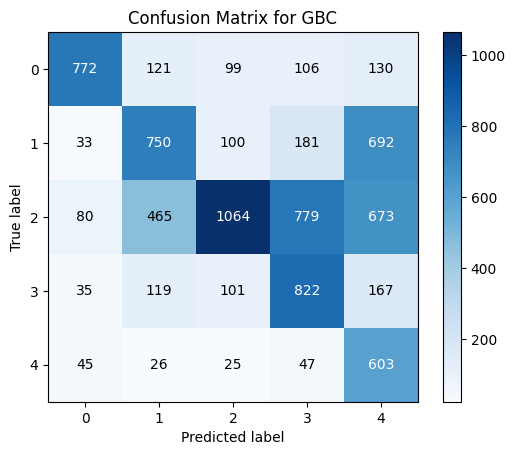

In [59]:
skplt.metrics.plot_confusion_matrix(test['label'], test['Predicted_label'], normalize=False, title = 'Confusion Matrix for GBC');

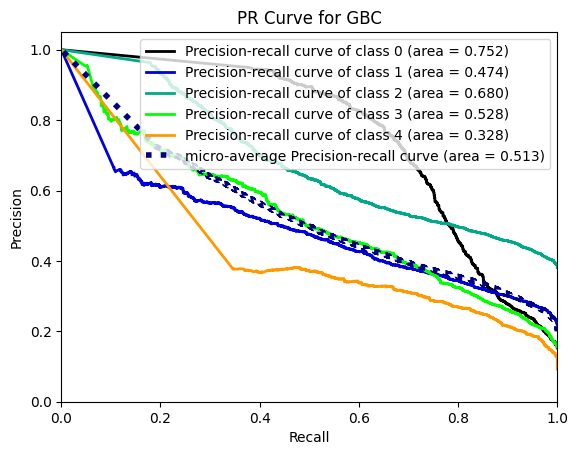

In [60]:
skplt.metrics.plot_precision_recall(test['label'], y_proba, title = 'PR Curve for GBC');

In [61]:
from sklearn import svm

In [62]:
clf = svm.SVC()
clf.fit(df_Machine_Learning, final_df['label'])

SVC()

In [63]:
y_pred = clf.predict(Test_Machine_Learning_df)

In [64]:
y_pred

array(['1', '3', '1', ..., '1', '3', '1'], dtype=object)

In [65]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (test.shape[0], (test['label'] != y_pred).sum()))

Number of mislabeled points out of a total 8035 points : 1827


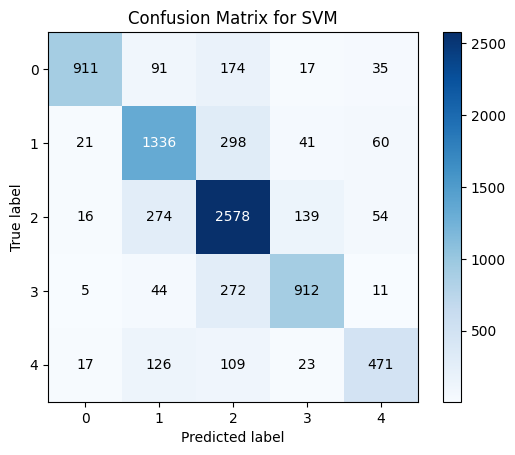

In [66]:
skplt.metrics.plot_confusion_matrix(test['label'], y_pred, normalize=False, title = 'Confusion Matrix for SVM');

In [67]:
y_proba1 = clf_reloaded.predict_proba(Test_Machine_Learning_df)
y_proba1

array([[5.25774180e-073, 1.00000000e+000, 6.61308210e-024,
        1.88141942e-052, 6.36236846e-225],
       [2.08739373e-036, 1.29244626e-016, 3.87323003e-011,
        1.00000000e+000, 1.94919711e-018],
       [9.53520905e-018, 9.99831222e-001, 4.39843264e-007,
        1.68337687e-004, 1.25992724e-013],
       ...,
       [4.30010700e-037, 9.65971314e-001, 4.32355210e-004,
        1.43325447e-008, 3.35963168e-002],
       [8.46184573e-007, 1.20083374e-008, 2.00854159e-006,
        5.78283860e-001, 4.21713274e-001],
       [1.68002058e-005, 1.68646060e-003, 9.98296739e-001,
        2.45552909e-019, 4.12087297e-079]])

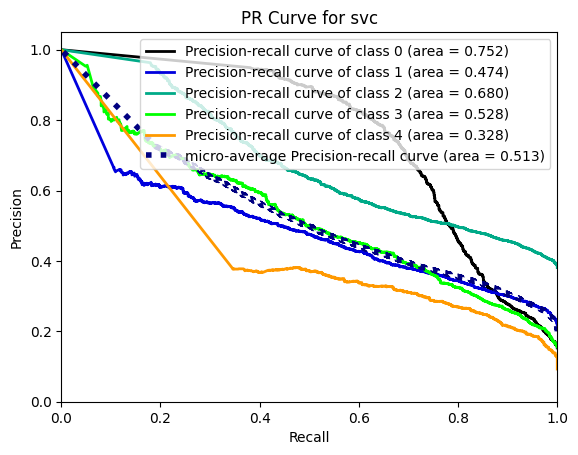

In [70]:
skplt.metrics.plot_precision_recall(test['label'], y_proba1, title = 'PR Curve for svc');

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1228
           1       0.71      0.76      0.74      1756
           2       0.75      0.84      0.79      3061
           3       0.81      0.73      0.77      1244
           4       0.75      0.63      0.68       746

    accuracy                           0.77      8035
   macro avg       0.79      0.74      0.76      8035
weighted avg       0.78      0.77      0.77      8035

